# Dong Baek Jeon - Transaction Data Analysis

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [135]:
# Set Random Seed for reproducibility
seed = 42
np.random.seed(seed)

In [136]:
# Load the data
data = pd.read_csv('Data/2023-09.csv', encoding='cp949')

In [137]:
# Display the 10 random rows of the data
data.sample(10)

,strd_date,strd_tizn_val,ctpr_nm,ccg_nm,adn_dgnm,tz_area_val,tz_area_lgd_cdn_val,tz_area_ltd_cdn_val,cardc_nm,tpbuz_cd,tpbuz_nm,bth_yr,sex_cd,trns_cnt,ttl_trns_amt
215755,20230902,15,부산광역시,금정구,구서1동,21110690030006,129.090120,35.246843,부산,8021,스넥,1992,M,1,6000
961266,20230907,11,부산광역시,사상구,모라1동,21150520010104,128.989019,35.185287,하나,8021,스넥,1957,F,1,11500
2660314,20230917,14,부산광역시,수영구,수영동,21140530010011,129.121038,35.168562,코나,4020,슈퍼마켓,1966,M,1,9330
4209339,20230926,21,부산광역시,연제구,연산5동,21130590020102,129.076407,35.180755,부산,4010,편 의 점,1975,F,1,7700
177157,20230902,12,부산광역시,부산진구,범천2동,21050840020007,129.054691,35.146954,코나,4020,슈퍼마켓,1964,F,1,1100
233407,20230902,16,부산광역시,연제구,연산9동,21130630020017,129.108296,35.182809,부산,2001,골프용품 전문점,1954,M,1,23000
412248,20230903,23,부산광역시,남구,용호1동,21070570020006,129.111691,35.119585,하나,8006,서양음식,1971,F,1,3500
4456481,20230928,10,부산광역시,해운대구,반여2동,21090580010006,129.130524,35.196458,코나,4020,슈퍼마켓,1986,F,1,1980
637576,20230905,12,부산광역시,해운대구,우1동,21090730010101,129.150073,35.160469,코나,8001,일반한식,1956,F,1,9600
3708144,20230923,19,부산광역시,사하구,장림2동,21100610020005,128.971228,35.080243,하나,8001,일반한식,1985,M,1,60000


In [138]:
# Load the data spec sheet
spec = pd.read_excel('Data/data_spec.xlsx')

# Display all rows of the data spec sheet
pd.set_option('display.max_rows', None)
spec

,테이블 ID,테이블명,NO,메타영문명,메타한글명,데이터타입,길이,Null,정의
0,TBBP23_BS_20,"집계구 단위 업종별 지역화폐 거래량, 금액 데이터",1,STRD_DATE,기준일자,VARCHAR,8,N,기준일자(YYYYMMDD)
1,TBBP23_BS_20,"집계구 단위 업종별 지역화폐 거래량, 금액 데이터",2,STRD_TIZN_VAL,기준시간대값,VARCHAR,40,Y,기준시간(hh)
2,TBBP23_BS_20,"집계구 단위 업종별 지역화폐 거래량, 금액 데이터",3,CTPR_NM,시도명,VARCHAR,100,Y,시도명
3,TBBP23_BS_20,"집계구 단위 업종별 지역화폐 거래량, 금액 데이터",4,CCG_NM,시군구명,VARCHAR,100,Y,시군구명
4,TBBP23_BS_20,"집계구 단위 업종별 지역화폐 거래량, 금액 데이터",5,ADN_DGNM,행정동명,VARCHAR,100,Y,행정동명
5,TBBP23_BS_20,"집계구 단위 업종별 지역화폐 거래량, 금액 데이터",6,TZ_AREA_VAL,집계구역값,VARCHAR,40,Y,집계구코드
6,TBBP23_BS_20,"집계구 단위 업종별 지역화폐 거래량, 금액 데이터",7,TZ_AREA_LGD_CDN_VAL,집계구역경도좌표값,VARCHAR,40,Y,집계구 x좌표
7,TBBP23_BS_20,"집계구 단위 업종별 지역화폐 거래량, 금액 데이터",8,TZ_AREA_LTD_CDN_VAL,집계구역위도좌표값,VARCHAR,40,Y,집계구 y좌표
8,TBBP23_BS_20,"집계구 단위 업종별 지역화폐 거래량, 금액 데이터",9,CARDC_NM,카드사명,VARCHAR,20,Y,카드사명칭
9,TBBP23_BS_20,"집계구 단위 업종별 지역화폐 거래량, 금액 데이터",10,TPBUZ_CD,업종코드,VARCHAR,5,Y,BC카드사 기준 가맹정 업종 코드


In [139]:
data.dtypes

strd_date                int64
strd_tizn_val            int64
ctpr_nm                 object
ccg_nm                  object
adn_dgnm                object
tz_area_val              int64
tz_area_lgd_cdn_val    float64
tz_area_ltd_cdn_val    float64
cardc_nm                object
tpbuz_cd                 int64
tpbuz_nm                object
bth_yr                   int64
sex_cd                  object
trns_cnt                 int64
ttl_trns_amt             int64
dtype: object

In [140]:
data.describe()

,strd_date,strd_tizn_val,tz_area_val,tz_area_lgd_cdn_val,tz_area_ltd_cdn_val,tpbuz_cd,bth_yr,trns_cnt,ttl_trns_amt
count,4.756906e+06,4.756906e+06,4.756906e+06,4.756906e+06,4.756906e+06,4.756906e+06,4.756906e+06,4.756906e+06,4.756906e+06
mean,2.023092e+07,2.251236e+01,2.110066e+13,1.290629e+02,3.516900e+01,6.359087e+03,1.975351e+03,1.040021e+00,2.123521e+04
std,8.386407e+00,2.110963e+01,8.477373e+10,6.498948e-02,5.164960e-02,2.075325e+03,2.582727e+01,2.325572e-01,4.570737e+04
min,2.023090e+07,0.000000e+00,2.101051e+13,1.288042e+02,3.501250e+01,1.002000e+03,1.921000e+03,1.000000e+00,1.000000e+00
25%,2.023091e+07,1.300000e+01,2.106051e+13,1.290199e+02,3.513643e+01,4.020000e+03,1.965000e+03,1.000000e+00,4.100000e+03
50%,2.023092e+07,1.600000e+01,2.109064e+13,1.290687e+02,3.516806e+01,7.102000e+03,1.975000e+03,1.000000e+00,8.600000e+03
75%,2.023092e+07,1.900000e+01,2.112056e+13,1.291033e+02,3.520188e+01,8.006000e+03,1.986000e+03,1.000000e+00,2.000000e+04
max,2.023093e+07,9.500000e+01,2.151033e+13,1.292890e+02,3.538704e+01,9.998000e+03,9.931000e+03,8.500000e+01,1.600000e+06


In [141]:
# Which district has the most number of transactions?

# Group the data by district(ccg_nm, adn_dgnm) and sum trns_cnt
df_n_trans = data.groupby(['ccg_nm', 'adn_dgnm'])['trns_cnt'].sum().reset_index()

# Sort the data by trns_cnt in descending order
df_n_trans = df_n_trans.sort_values('trns_cnt', ascending=False)

# Display the top 10 districts with the most number of transactions
df_n_trans.head(10)

,ccg_nm,adn_dgnm,trns_cnt
85,부산진구,부전1동,103569
6,강서구,명지1동,93797
22,금정구,장전2동,93497
32,남구,대연3동,83715
86,부산진구,부전2동,83005
106,북구,화명3동,79949
27,기장군,정관읍,79822
24,기장군,기장읍,64173
198,해운대구,우2동,62243
192,해운대구,반여1동,60343


In [142]:
# Which district has the highest total transaction amount?

# Group the data by district(ccg_nm, adn_dgnm) and sum ttl_trns_amt
df_trns_amt = data.groupby(['ccg_nm', 'adn_dgnm'])['ttl_trns_amt'].sum().reset_index()

# Sort the data by ttl_trns_amt in descending order
df_trns_amt = df_trns_amt.sort_values('ttl_trns_amt', ascending=False)

# Display the top 10 districts with the highest total transaction amount
df_trns_amt.head(10)

,ccg_nm,adn_dgnm,ttl_trns_amt
6,강서구,명지1동,2367604690
85,부산진구,부전1동,2333976576
86,부산진구,부전2동,1984538598
27,기장군,정관읍,1850539355
106,북구,화명3동,1812934604
22,금정구,장전2동,1720873070
32,남구,대연3동,1693947698
192,해운대구,반여1동,1625387644
59,동래구,명륜동,1560321734
24,기장군,기장읍,1509707892


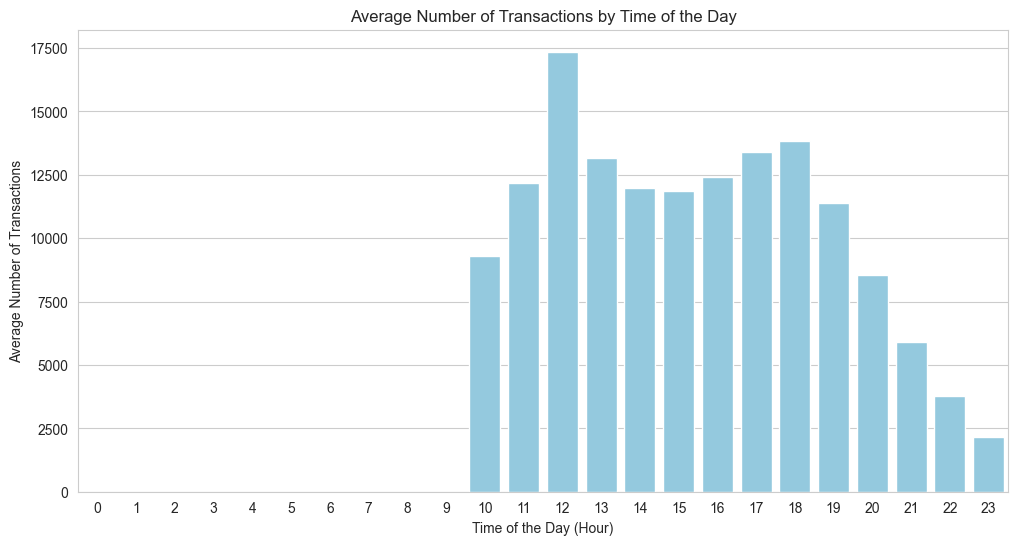

In [143]:
# The number of transactions with respect to the time of the day


df_time_trns = data[['strd_date', 'strd_tizn_val', 'trns_cnt']]

# Remove the rows with time zone values that are not in the range of 0-23
df_time_trns = df_time_trns[df_time_trns['strd_tizn_val'].between(0, 23)]

# Group the data by hour and sum trns_cnt
df_time_trns = df_time_trns.groupby('strd_tizn_val')['trns_cnt'].sum().reset_index()

# Divide the total number of transactions by the number of days to get the average transaction amount
df_time_trns['trns_cnt'] = df_time_trns['trns_cnt'] / data['strd_date'].nunique()

# Plot the average number of transactions with respect to the time of the day
plt.figure(figsize=(12, 6))
sns.barplot(x='strd_tizn_val', y='trns_cnt', data=df_time_trns, color='skyblue')
plt.title('Average Number of Transactions by Time of the Day')
plt.xlabel('Time of the Day (Hour)')
plt.ylabel('Average Number of Transactions')
plt.show()

In [182]:
# Check the number of transactions before 10 AM
before_10am = df_time_trns[df_time_trns['strd_tizn_val'] < 10]['trns_cnt'].sum()
before_10am


np.float64(3.5333333333333337)

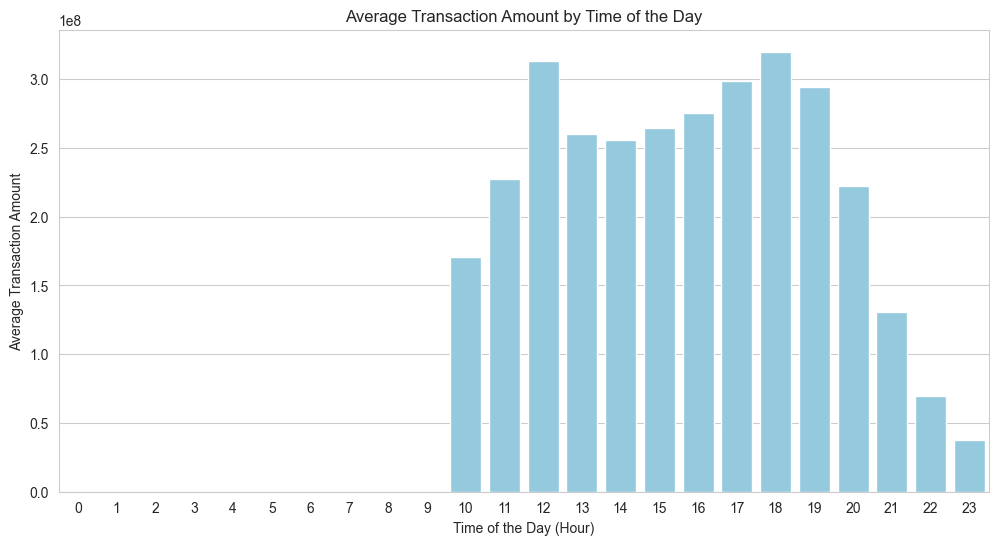

In [144]:
# The average transaction amount with respect to the time of the day

df_time_amt = data[['strd_date', 'strd_tizn_val', 'ttl_trns_amt']]

# Remove the rows with time zone values that are not in the range of 0-23
df_time_amt = df_time_amt[df_time_amt['strd_tizn_val'].between(0, 23)]

# Sum ttl_trns_amt and divide it by the number of days to get the average transaction amount
df_time_amt = df_time_amt.groupby('strd_tizn_val')['ttl_trns_amt'].sum().reset_index()

# Divide the total transaction amount by the number of days to get the average transaction amount
df_time_amt['ttl_trns_amt'] = df_time_amt['ttl_trns_amt'] / data['strd_date'].nunique()

# Plot the average transaction amount with respect to the time of the day
plt.figure(figsize=(12, 6))
sns.barplot(x='strd_tizn_val', y='ttl_trns_amt', data=df_time_amt, color='skyblue')
plt.title('Average Transaction Amount by Time of the Day')
plt.xlabel('Time of the Day (Hour)')
plt.ylabel('Average Transaction Amount')
plt.show()

In [145]:
# # Sample 10,000 rows from the data

# sample_spatial = data.sample(10_000, random_state=seed)

# sample_spatial.describe()

In [146]:
# # Color mapping for the different sectors
# sector_names = sample_spatial['tpbuz_nm'].unique()

# sector_colors = sns.color_palette('tab20', n_colors=len(sector_names))

# sector_color_map = dict(zip(sector_names, sector_colors))

# # RGB to Hex conversion
# def rgb_to_hex(rgb):
#     return '#{:02x}{:02x}{:02x}'.format(int(rgb[0]*255), int(rgb[1]*255), int(rgb[2]*255))

# sector_color_map_hex = {k: rgb_to_hex(v) for k, v in sector_color_map.items()}
# sector_color_map_hex

In [147]:
# import folium
# from tqdm.notebook import tqdm

# # Add a point to the map
# def add_point(row, map_obj):
#     folium.CircleMarker(
#         location=[row['tz_area_ltd_cdn_val'], row['tz_area_lgd_cdn_val']],
#         radius=5,  # Adjust marker size based on a value (e.g., transaction_amount)
#         popup=f"{row}",
#         fill=True,
#         color=sector_color_map_hex.get(row['tpbuz_nm']),
#     ).add_to(map_obj)

# # Create a Base Map Centered on Busan
# busan_map = folium.Map(location=[35.1796, 129.0756], zoom_start=12)

# # Add points to the map
# for index, row in tqdm(sample_spatial.iterrows(), total=sample_spatial.shape[0], desc="Adding Pointsto the map"):
#     add_point(row, busan_map)


# # Display the Map
# busan_map

In [148]:
# from folium.plugins import MarkerCluster

# # Add a point to the MarkerCluster
# def add_point_to_marker_cluster(row, marker_cluster_obj):
#     folium.Marker(
#         location=[row['tz_area_ltd_cdn_val'], row['tz_area_lgd_cdn_val']],
#         popup=f"Transaction Amount: {row['ttl_trns_amt']}",
#     ).add_to(marker_cluster_obj)

# cluster_map = busan_map
# # Create a MarkerCluster
# marker_cluster = MarkerCluster().add_to(cluster_map)

# # Add points to the MarkerCluster
# for index, row in tqdm(sample_spatial.iterrows(), total=sample_spatial.shape[0], desc="Adding Points to the MarkerCluster"):
#     add_point_to_marker_cluster(row, marker_cluster)


# # Display the Map
# cluster_map

In [149]:
# from folium.plugins import HeatMap

# heatmap_map = folium.Map(location=[35.1796, 129.0756], zoom_start=12)

# # Prepare data for the heatmap
# heatmap_data = data[['tz_area_ltd_cdn_val', 'tz_area_lgd_cdn_val']].values.tolist()


# # Create a HeatMap
# heat_map = HeatMap(
#     data=heatmap_data,
#     radius=15
# ).add_to(heatmap_map)

# # Display the Map
# heatmap_map

In [150]:
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.cluster import DBSCAN, KMeans

In [151]:
# sample_cluster = data.sample(10_000, random_state=seed)

# essential_columns = [
#     'trns_cnt', 'ttl_trns_amt', 'bth_yr', 'sex_cd',
#     'tz_area_lgd_cdn_val', 'tz_area_ltd_cdn_val',
#     'tpbuz_cd', 'strd_tizn_val',
# ]

# sample_cluster = sample_cluster[essential_columns]

# sample_cluster = sample_cluster.dropna()

In [152]:
# sample_cluster.describe()

In [153]:
# # Encode categorical columns
# label_encoders = {}
# categorical_cols = ['sex_cd']
# for col in categorical_cols:
#     le = LabelEncoder()
#     sample_cluster[col] = le.fit_transform(sample_cluster[col])
#     label_encoders[col] = le

In [154]:
# # Normalize numerical features for clustering
# scaler = StandardScaler()
# numerical_cols = [
#     'trns_cnt', 'ttl_trns_amt', 'bth_yr',
#     'tz_area_lgd_cdn_val', 'tz_area_ltd_cdn_val',
#     'tpbuz_cd', 'strd_tizn_val'
#     ]

# standardized_cols = [f"{col}_std" for col in numerical_cols]

# # Normalize the numerical columns preserving the original columns
# sample_cluster[standardized_cols] = scaler.fit_transform(sample_cluster[numerical_cols])

In [155]:
# sample_cluster.head()

In [156]:
# sample_cluster.describe()

In [157]:
# data_for_clustering = sample_cluster[[*standardized_cols, "sex_cd"]]

# # Apply DBSCAN
# dbscan = DBSCAN(eps=1, min_samples=6)  # Adjust `eps` and `min_samples` for your dataset
# sample_cluster['Cluster'] = dbscan.fit_predict(data_for_clustering)

In [158]:
# # Plot results
# palette = sns.color_palette('tab20')
# sns.scatterplot(x='tz_area_lgd_cdn_val', y='tz_area_ltd_cdn_val', hue='Cluster', data=sample_cluster[sample_cluster['Cluster'] != -1], palette=palette, legend='full')

# # Plot anomalies
# sns.scatterplot(x='tz_area_lgd_cdn_val', y='tz_area_ltd_cdn_val', data=sample_cluster[sample_cluster['Cluster'] == -1], color='red', label='Anomaly')

# plt.title("DBSCAN Clustering")
# plt.legend()
# plt.show()

# # Identify anomalies (Cluster -1)
# anomalies = sample_cluster[sample_cluster['Cluster'] == -1]
# print(f"Number of anomalies detected: {len(anomalies)}")

In [159]:
# sample_cluster['Cluster'].value_counts()

In [160]:
# import folium

# # Visualize it on the map
# anomalies_map = folium.Map(location=[35.1796, 129.0756], zoom_start=12)

# # Add points to the map
# for index, row in sample_cluster.iterrows():
#     folium.CircleMarker(
#         location=[row['tz_area_ltd_cdn_val'], row['tz_area_lgd_cdn_val']],
#         radius=5,
#         popup=f"{row}",
#         fill=True,
#         color="red" if row['Cluster'] == -1 else palette[int(row['Cluster'])]
#     ).add_to(anomalies_map)

# anomalies_map

In [161]:
# sample_cluster2 = sample_cluster.drop('Cluster', axis=1)

# # Apply K-Means
# kmeans = KMeans(n_clusters=10, random_state=seed)  # Adjust `n_clusters`
# sample_cluster2['Cluster'] = kmeans.fit_predict(sample_cluster2[numerical_cols])

# # Compute distances to cluster centroids
# sample_cluster2['Distance_to_Centroid'] = np.min(kmeans.transform(sample_cluster2[numerical_cols]), axis=1)

# # Define anomalies as transactions with large distances
# threshold = sample_cluster2['Distance_to_Centroid'].quantile(0.999)
# anomalies = sample_cluster2[sample_cluster2['Distance_to_Centroid'] > threshold]

# print(f"Number of anomalies detected: {len(anomalies)}")

# # Visualize clusters and anomalies
# sns.scatterplot(x='tz_area_lgd_cdn_val', y='tz_area_ltd_cdn_val', hue='Cluster', data=sample_cluster2, palette='tab20')
# plt.scatter(anomalies['tz_area_lgd_cdn_val'], anomalies['tz_area_ltd_cdn_val'], color='red', label='Anomalies')
# plt.legend()
# plt.title("K-Means Clustering with Anomalies")
# plt.show()


# K-Means Clustering

In [162]:
from sklearn.cluster import KMeans
import matplotlib.colors as mcolors

sample_geo_cluster = data.sample(10_000, random_state=seed)

sample_geo_cluster = sample_geo_cluster.dropna()


In [163]:
# Remove invalid latitude and longitude values
sample_geo_cluster = sample_geo_cluster[
    sample_geo_cluster['tz_area_ltd_cdn_val'].between(33, 37) &
    sample_geo_cluster['tz_area_lgd_cdn_val'].between(126, 132)
]

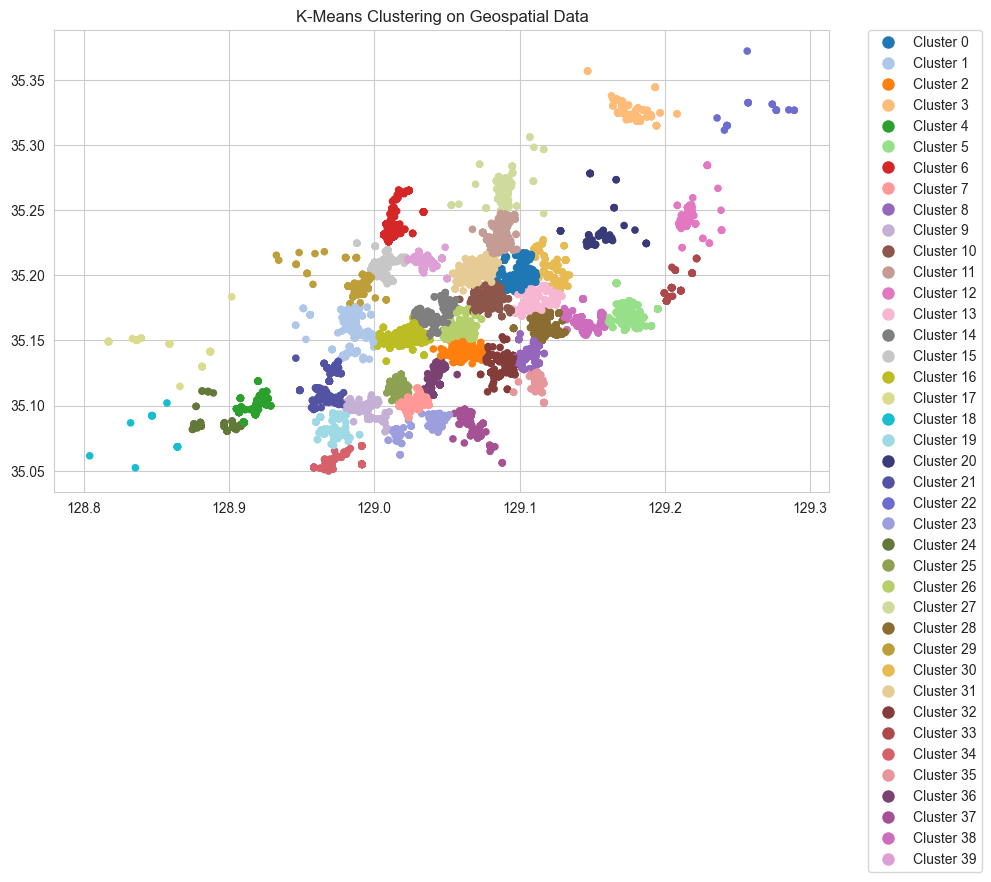

In [164]:
# Apply K-Means
kmeans = KMeans(n_clusters=40, random_state=seed)  # Adjust `n_clusters`
sample_geo_cluster['Cluster'] = kmeans.fit_predict(sample_geo_cluster[['tz_area_lgd_cdn_val', 'tz_area_ltd_cdn_val']])


# Combine tab20 and tab20b palettes to get 40 distinct colors
palette = sns.color_palette('tab20') + sns.color_palette('tab20b')

# Ensure the palette has at least 40 colors
assert len(palette) >= 40

# Convert the palette to hex format
palette = [mcolors.rgb2hex(color) for color in palette]

sample_geo_cluster['Color'] = sample_geo_cluster['Cluster'].apply(lambda x: palette[x])

# Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(
    x=sample_geo_cluster['tz_area_lgd_cdn_val'],
    y=sample_geo_cluster['tz_area_ltd_cdn_val'],
    c=sample_geo_cluster['Color'],
    s=20,
)
plt.title("K-Means Clustering on Geospatial Data")

# Create legend handles
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=palette[i], markersize=10, label=f'Cluster {i}') for i in range(40)]

# Add the legend to the plot
plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [165]:
sample_geo_cluster['Cluster'].value_counts()

Cluster
26    627
11    617
31    576
10    546
5     435
28    426
0     415
16    367
6     338
13    337
14    336
1     335
8     327
21    323
7     313
2     275
32    272
15    243
27    206
30    201
38    198
36    195
4     191
9     185
3     175
23    167
19    151
29    149
34    146
39    131
25    126
35    118
12    110
24    105
37     97
20     90
33     66
17     48
22     20
18     17
Name: count, dtype: int64

In [181]:
import folium


# Visualize it on the map
geo_cluster_map = folium.Map(location=[35.1796, 129.0756], zoom_start=12)

# Add centroids to the map
for cluster in sample_geo_cluster['Cluster'].unique():
    # if cluster != 33:
    #     continue
    
    cluster_data = sample_geo_cluster[sample_geo_cluster['Cluster'] == cluster]
    color = cluster_data['Color'].values[0]
    centroid = cluster_data[['tz_area_lgd_cdn_val', 'tz_area_ltd_cdn_val']].mean()
    folium.CircleMarker(
        location=[centroid['tz_area_ltd_cdn_val'], centroid['tz_area_lgd_cdn_val']],
        radius=15,
        popup=f"Cluster: {cluster}, lat: {centroid['tz_area_lgd_cdn_val']}, lon: {centroid['tz_area_ltd_cdn_val']}",
        color = color,
        fill=True,
        fill_opacity=0.8
    ).add_to(geo_cluster_map)

# # Add points to the map
# for index, row in sample_geo_cluster.iterrows():
#     folium.CircleMarker(
#         location=[row['tz_area_ltd_cdn_val'], row['tz_area_lgd_cdn_val']],
#         radius=5,
#         popup=f"Cluster: {row}",
#         fill=True,
#         color=row['Color']
#     ).add_to(geo_cluster_map)

geo_cluster_map

In [167]:
# strd_date	strd_tizn_val	ctpr_nm	ccg_nm	adn_dgnm
# tz_area_val	tz_area_lgd_cdn_val	tz_area_ltd_cdn_val	cardc_nm
# tpbuz_cd	tpbuz_nm	bth_yr	sex_cd	trns_cnt	ttl_trns_amt

# Grouping by clusters and computing statistics
cluster_stats = sample_geo_cluster.groupby('Cluster').agg({
    'trns_cnt': ['mean', 'median', 'std'],
    'ttl_trns_amt': ['mean', 'median', 'std'],
    'bth_yr': ['mean', 'median', 'std'],
    'sex_cd': 'value_counts',
    'tpbuz_cd': 'value_counts'
}).reset_index()

# Display the cluster statistics
cluster_stats.head()


index  trns_cnt                   ttl_trns_amt                         \
             mean median       std          mean   median           std   
0     0  1.040964    1.0  0.210266  20839.807229   9900.0  36459.237141   
1     1  1.032836    1.0  0.194527  18021.167164   8800.0  27187.238616   
2     2  1.014545    1.0  0.119942  17514.727273   8000.0  30949.689565   
3     3  1.040000    1.0  0.196521  20594.000000   9500.0  34841.799477   
4     4  1.068063    1.0  0.272563  26877.748691  10000.0  54563.015309   

        bth_yr                          sex_cd     tpbuz_cd  
          mean  median        std value_counts value_counts  
0  1972.284337  1971.0  13.343877          NaN          NaN  
1  1977.214925  1978.0  13.674633          NaN          NaN  
2  1976.330909  1977.0  13.674913          NaN          NaN  
3  1977.520000  1979.0  12.549140          NaN          NaN  
4  1978.712042  1980.0  10.565874          NaN          NaN

In [168]:
# Find top 5 most frequent tpbuz_nm for each cluster and make is a single string
top_5_sectors = sample_geo_cluster.groupby('Cluster')['tpbuz_nm'].value_counts().groupby('Cluster').head(5).reset_index(name='count')
top_5_sectors = top_5_sectors.groupby('Cluster')['tpbuz_nm'].apply(lambda x: ', '.join(x)).reset_index()

# Add top 5 most common sector to sample_geo_cluster as a new column('top5_sector_in_cluster')
top_5_sectors = top_5_sectors.rename(columns={'tpbuz_nm': 'top5_sector_in_cluster'})
w_top5_sectors = sample_geo_cluster.merge(top_5_sectors, on=['Cluster'])

w_top5_sectors.head()

,strd_date,strd_tizn_val,ctpr_nm,ccg_nm,adn_dgnm,tz_area_val,tz_area_lgd_cdn_val,tz_area_ltd_cdn_val,cardc_nm,tpbuz_cd,tpbuz_nm,bth_yr,sex_cd,trns_cnt,ttl_trns_amt,Cluster,Color,top5_sector_in_cluster
0,20230902,15,부산광역시,금정구,구서1동,21110690030006,129.090120,35.246843,부산,8021,스넥,1992,M,1,6000,11,#c49c94,"서양음식, 일반한식, 편 의 점, 슈퍼마켓, 스넥"
1,20230907,11,부산광역시,사상구,모라1동,21150520010104,128.989019,35.185287,하나,8021,스넥,1957,F,1,11500,29,#bd9e39,"편 의 점, 서양음식, 일반한식, 슈퍼마켓, 기타음료식품"
2,20230917,14,부산광역시,수영구,수영동,21140530010011,129.121038,35.168562,코나,4020,슈퍼마켓,1966,M,1,9330,28,#8c6d31,"편 의 점, 슈퍼마켓, 일반한식, 서양음식, 약국"
3,20230926,21,부산광역시,연제구,연산5동,21130590020102,129.076407,35.180755,부산,4010,편 의 점,1975,F,1,7700,10,#8c564b,"편 의 점, 일반한식, 서양음식, 슈퍼마켓, 기타음료식품"
4,20230902,12,부산광역시,부산진구,범천2동,21050840020007,129.054691,35.146954,코나,4020,슈퍼마켓,1964,F,1,1100,2,#ff7f0e,"편 의 점, 서양음식, 일반한식, 슈퍼마켓, 약국"


In [180]:
top_5_sectors

,Cluster,top5_sector_in_cluster
0,0,"슈퍼마켓, 일반한식, 편 의 점, 서양음식, 약국"
1,1,"편 의 점, 일반한식, 슈퍼마켓, 서양음식, 정육점"
2,2,"편 의 점, 서양음식, 일반한식, 슈퍼마켓, 약국"
3,3,"슈퍼마켓, 서양음식, 일반한식, 편 의 점, 기타음료식품"
4,4,"서양음식, 일반한식, 슈퍼마켓, 편 의 점, 농·축·수산품"
5,5,"서양음식, 일반한식, 편 의 점, 약국, 스넥"
6,6,"일반한식, 서양음식, 편 의 점, 슈퍼마켓, 약국"
7,7,"일반한식, 서양음식, 편 의 점, 슈퍼마켓, 약국"
8,8,"일반한식, 편 의 점, 서양음식, 슈퍼마켓, 약국"
9,9,"편 의 점, 슈퍼마켓, 일반한식, 서양음식, 약국"


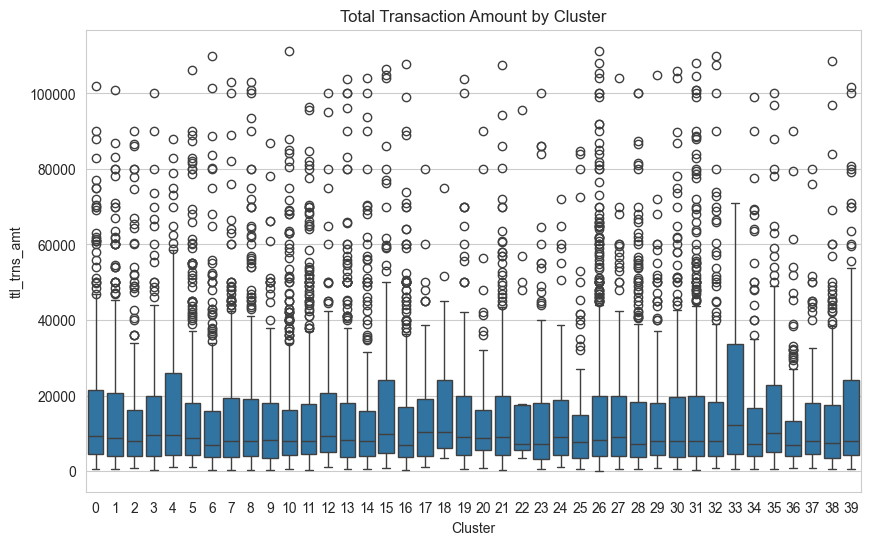

In [119]:
# Remove outliers (> 2 standard deviations)
transaction_amounts = sample_geo_cluster['ttl_trns_amt']
outliers = transaction_amounts[transaction_amounts > transaction_amounts.mean() + 2 * transaction_amounts.std()]
filtered_data = sample_geo_cluster[~sample_geo_cluster['ttl_trns_amt'].isin(outliers)]

# Boxplot for transaction amounts across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='Cluster', y='ttl_trns_amt')
plt.title('Total Transaction Amount by Cluster')
plt.show()

<Figure size 1200x600 with 0 Axes>

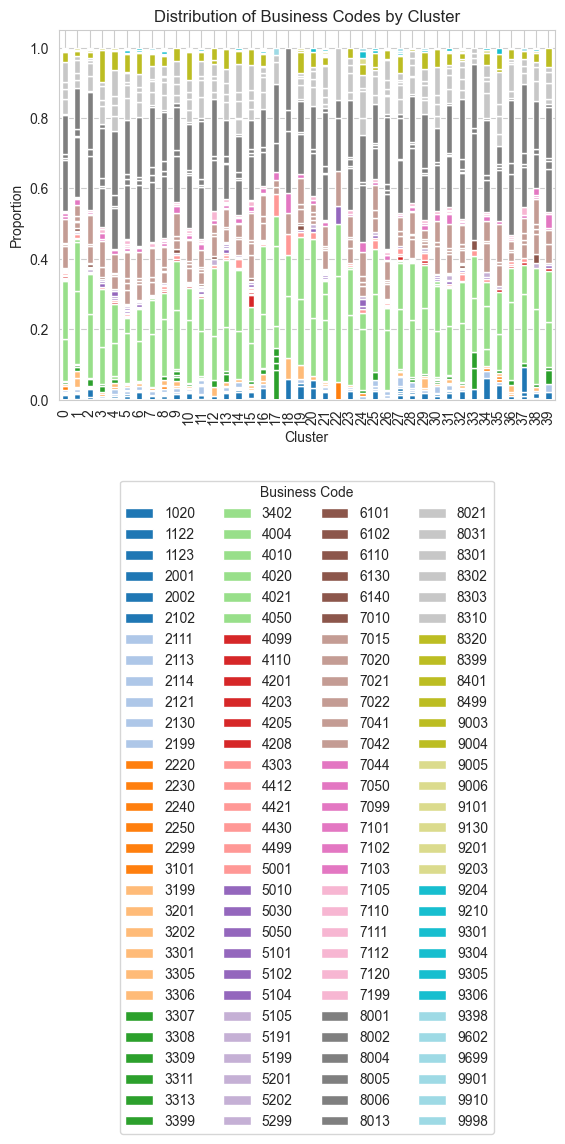

In [122]:
# tp_buz_cd for each cluster
buz_cd_counts = sample_geo_cluster.groupby('Cluster')['tpbuz_cd'].value_counts().unstack().fillna(0)
buz_cd_counts = buz_cd_counts.div(buz_cd_counts.sum(axis=1), axis=0)

# Plot the distribution of tp_buz_cd for each cluster
plt.figure(figsize=(12, 6))
buz_cd_counts.plot(kind='bar', stacked=True, cmap='tab20')
plt.title('Distribution of Business Codes by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
# plt.legend(title='Business Code', bbox_to_anchor=(1.05, 1), loc='upper left')
# Align the legend at the bottom horizontally
plt.legend(title='Business Code', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=4)



plt.show()

In [121]:
biz_cds = data['tpbuz_cd'].unique()

biz_cd_to_nm = {}

# Create a dictionary mapping business codes to business names
for biz_cd in biz_cds:
    biz_name = data[data['tpbuz_cd'] == biz_cd]['tpbuz_nm'].iloc[0]
    biz_cd_to_nm[int(biz_cd)] = biz_name

biz_cd_to_nm

{4010: '편 의 점',
 8001: '일반한식',
 8021: '스넥',
 8006: '서양음식',
 3304: '유류판매',
 6110: '자동차정비',
 8310: '농·축·수산품',
 3309: '쌍용S-OIL',
 4499: '기타잡화',
 7020: '의원',
 7041: '약국',
 1123: '택시',
 4020: '슈퍼마켓',
 5104: '예·체능계학원',
 8301: '제과점',
 5001: '일반서적',
 7102: '미용원',
 7021: '한의원',
 5101: '외국어학원',
 7050: '동물병원',
 9210: '세탁소',
 9130: '사무서비스',
 2002: '스포츠·레져용품',
 3305: 'SK주유소',
 8302: '정육점',
 4004: '대형할인점',
 3301: '주유소',
 8399: '기타음료식품',
 5199: '기타 교육기관',
 7022: '치과의원',
 7105: '안경',
 7110: '화장품',
 5202: '사무용 OA기기',
 4021: '연 쇄 점',
 7120: '사우나',
 7010: '병원(응급실 운영)',
 2199: '기타레져업소',
 9901: '기계공구',
 4110: '농.축협 직영매장',
 8005: '중국식',
 2215: '민예·공예품',
 5030: '문구용품',
 6101: '자동차시트·타이어',
 8320: '미곡상',
 3308: '현대정유(오일뱅크)',
 6140: '주차장',
 3306: 'SK가스충전소',
 3101: '가전제품',
 9602: '비료.사료.종자',
 7103: '피부미용실',
 7101: '이용원',
 3307: 'GS주유소',
 2102: '골프연습장',
 9910: '비영리/대상',
 2114: '헬스클럽',
 8031: '위탁급식업',
 2020: 'DVD·음반·테이프 판매',
 7111: '미용재료',
 2299: '문화취미기타',
 3402: 'DP&E',
 5201: '컴퓨터',
 9133: '부동산 중개·임대',
 2240: '애

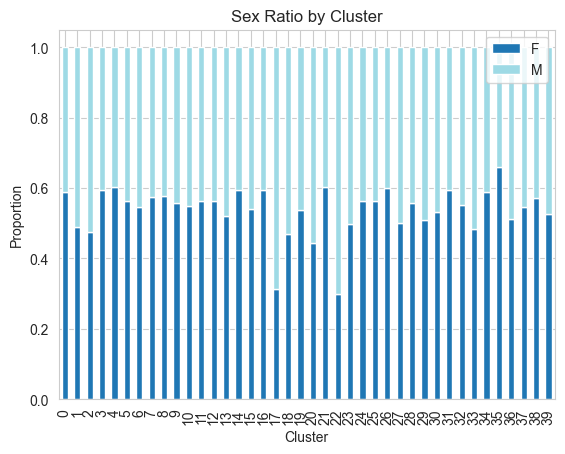

In [173]:
# Demographic distributions by cluster

# sex ratio by cluster
sex_ratio = sample_geo_cluster.groupby('Cluster')['sex_cd'].value_counts(normalize=True).unstack().fillna(0)

sex_ratio.plot(kind='bar', stacked=True, cmap='tab20')
plt.title('Sex Ratio by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion')
plt.legend()
plt.show()

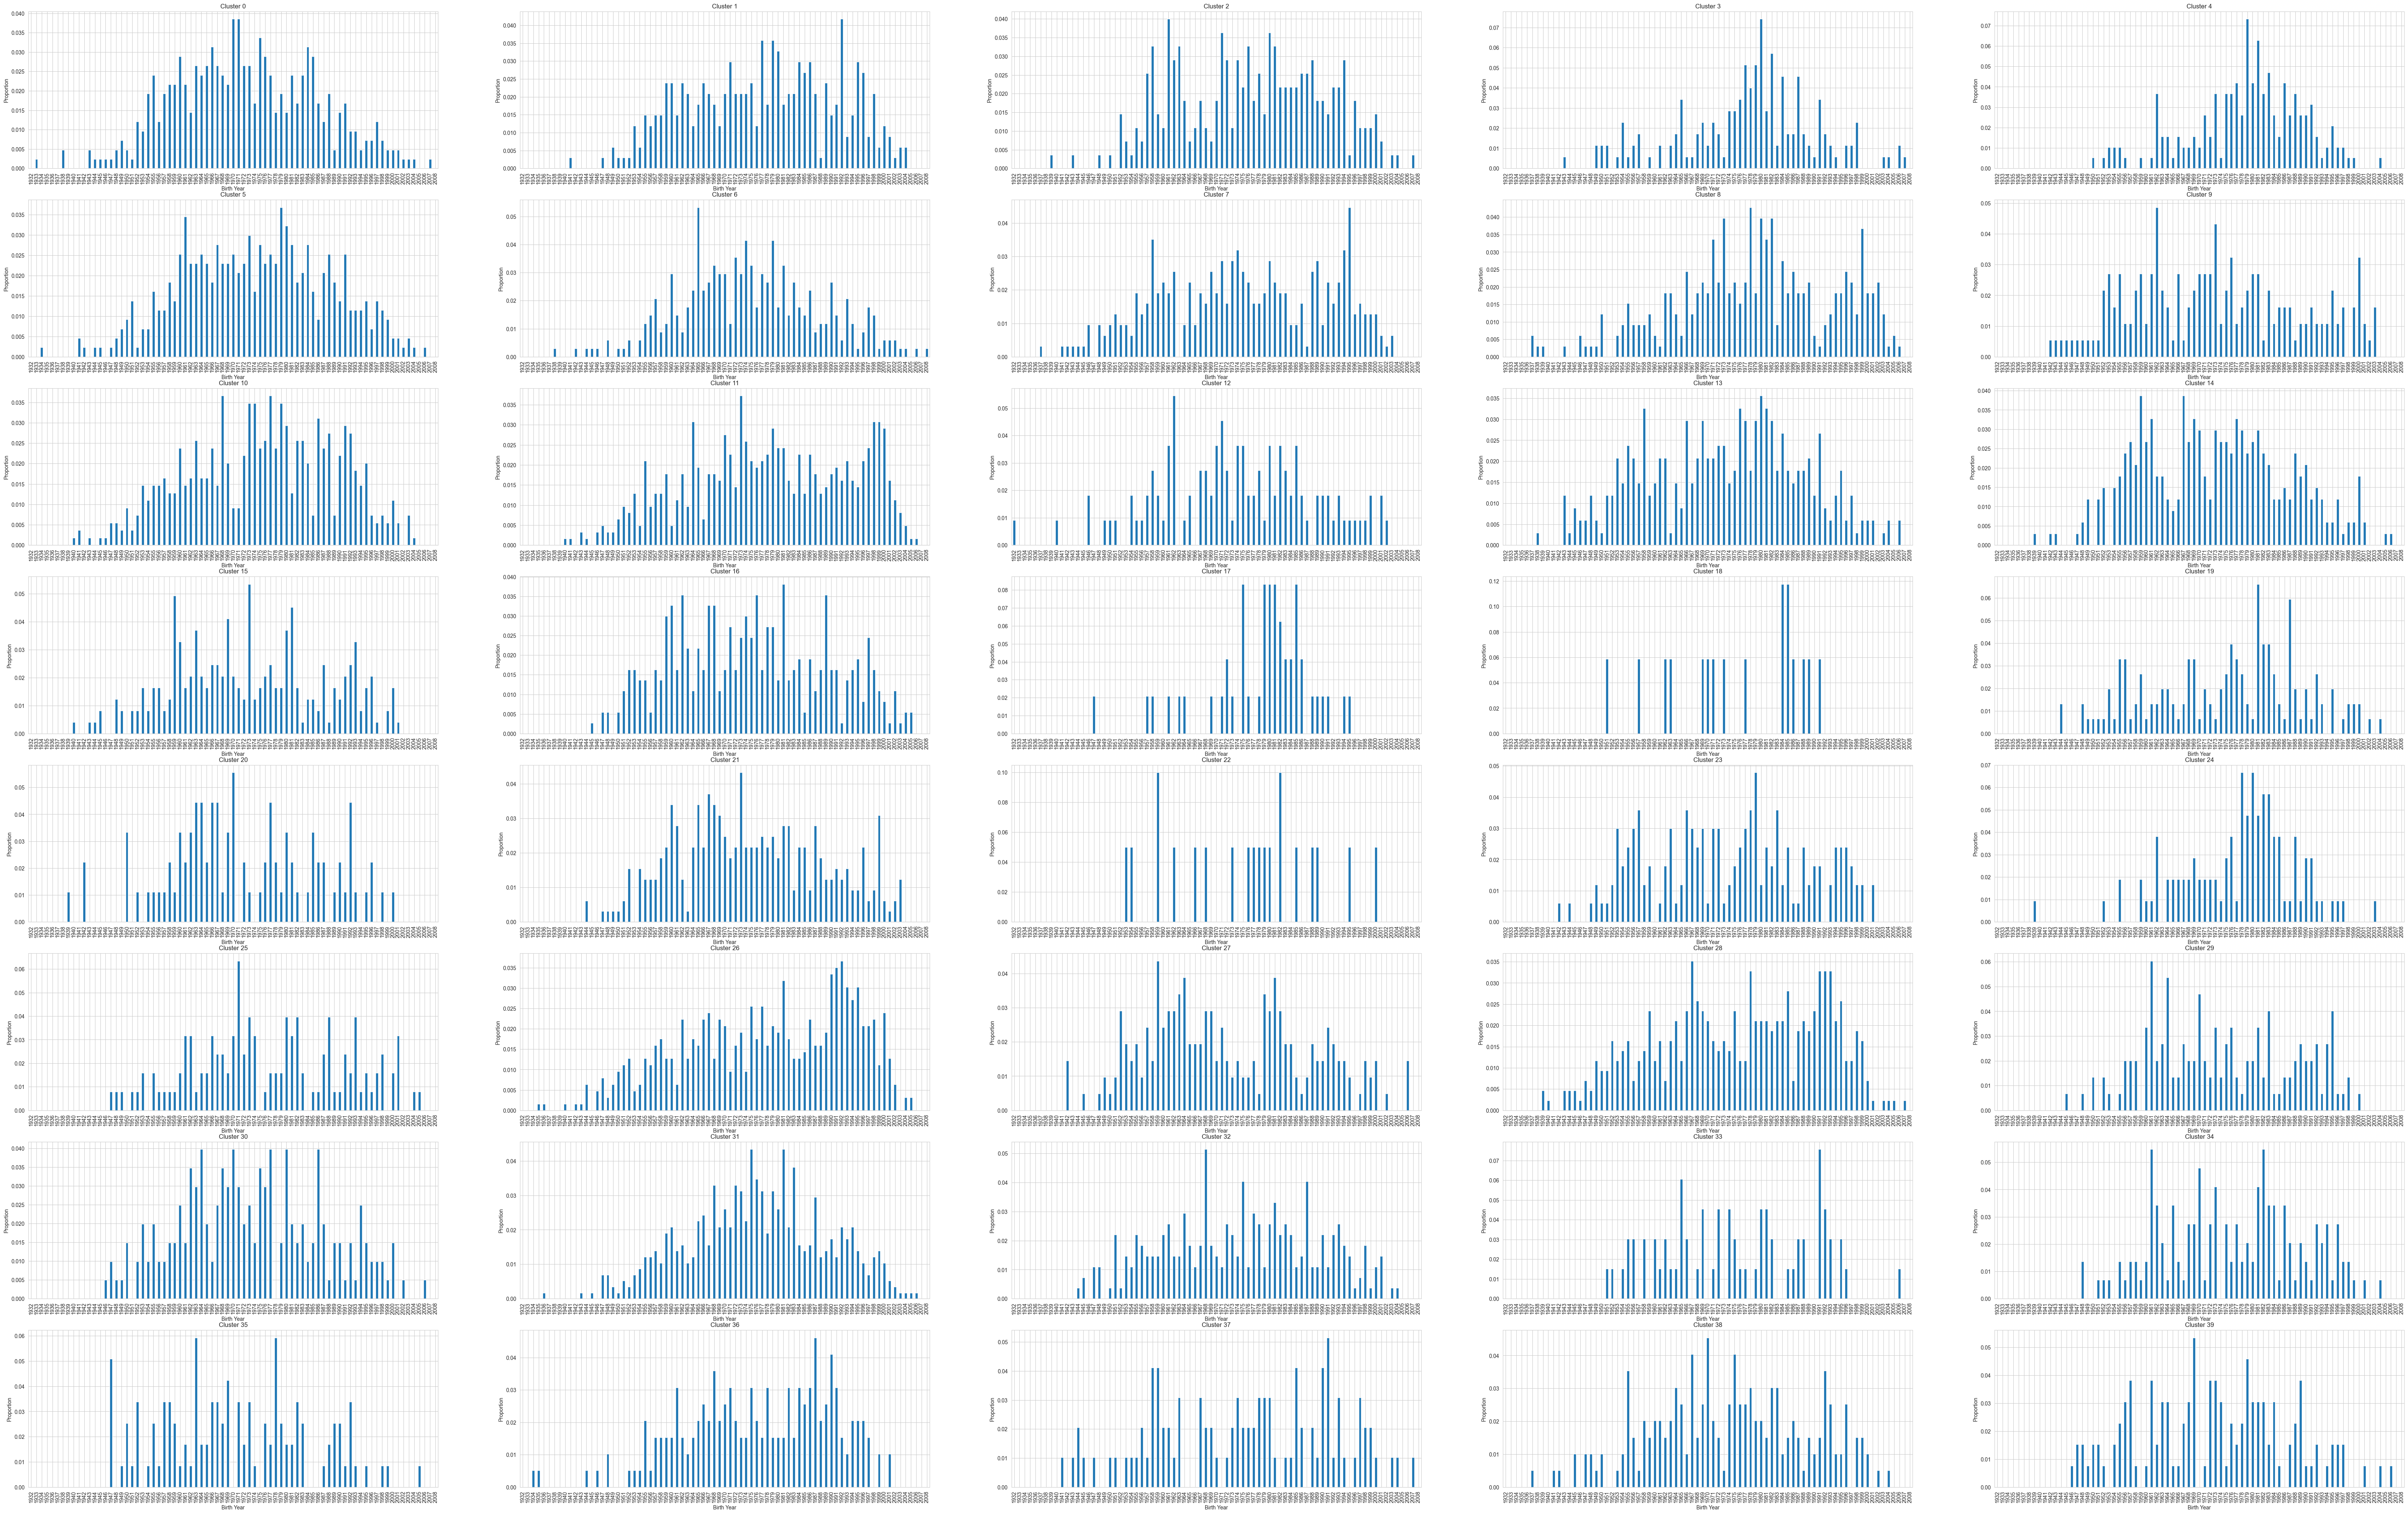

In [178]:
# birth year distribution by cluster
birth_year = sample_geo_cluster.groupby('Cluster')['bth_yr'].value_counts(normalize=True).unstack().fillna(0)

# Draw 40 subplots for each cluster
fig, axes = plt.subplots(8, 5, figsize=(80, 50))
axes = axes.flatten()
for i, (cluster, data) in enumerate(birth_year.iterrows()):
    data.plot(kind='bar', ax=axes[i], title=f'Cluster {cluster}', cmap='tab20')
    axes[i].set_xlabel('Birth Year')
    axes[i].set_ylabel('Proportion')
    axes[i].legend().remove()

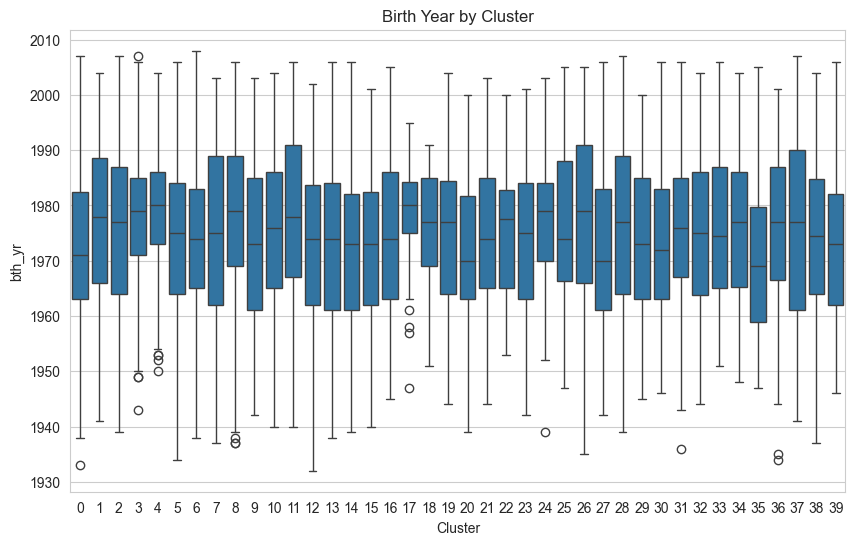

In [179]:
# Boxplot for birth year across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(data=sample_geo_cluster, x='Cluster', y='bth_yr')
plt.title('Birth Year by Cluster')
plt.show()

In [ ]:
3. 정관 - 정관 산업단지, 정관 신도시 (평균연령이 낮음 , 외국인 근로자)
4. 명지 국제 신도시 (아파트 대단지)
17.강서구 산업단지